# Algoritmusok elemző összehasonlítása

Limbek Zsófia munkája

## 1. Bevezetés

Dolgozatomban az Eszterházy Károly Egyetem LBT_PI212G3 kódú, Adatszerkezetek és algoritmusok gy. tárgyából tanult algoritmusokat elemzem. Az implementációk mellett különböző bemenetekkel mért futásidőket is bemutatok, illetve összehasonlítom az azonos célra használt különböző algoritmusokat.

Az algoritmusok implementálásához, a futásidők méréséhez, az adatok összegyűjtéséhez és ábrázolásához a `Python 3` programnyelvet használtam (verzió: `3.8`). A teljes kód megtalálható a [ebben](https://github.com/zslim/algoritmusok_elemzes) a GitHub repóban. A dolgozatba csak az algoritmusok kódját illesztem be, illetve a táblázatos kimutatásokat és az ábrákat itt készítem el. Ezekhez a `csv` formátumban elmentett mérési adatokat fogom beolvasni. Az elemzést a `pandas` és a `plotnine` csomagok segítségével végzem, amiket most importálok is.

In [2]:
import pandas
from plotnine import *

A bemutatott algoritmusokat random számokkal feltöltött listákra futtattam le az alábbi módon.
A bemenő listák elemszámát 1000-től indulva, ezrenként lépve, 10000-ig emeltem.
Minden elemszámra több futtatást végeztem.
A metszet és unió algoritmusok esetében ez a szám, a futás hossúsága miatt 10 (az unió 20 perc alatt futott le minden inputra), a többi algoritmusnál felemeltem 100-ra.
Minden futtatásnál új random bemenetet generáltam.
Ahol két bemenő lista van, ott mindkettőnek változtattam az elemszámát, de, szintén a hosszú futásidő miatt, mindig úgy, hogy az első sorozat elemszáma kisebb vagy egyenlő a másodikéval.
Ez a metszet és az unió esetében aggályos lehet, mivel egyik sem szimmetrikus a paraméterekre nézve.

## 2. Alap algoritmusok

Ebben a részben a metszet, az unió és az összefuttatás algoritmusokat mutatom be.
Ezek közös jellemzője, hogy két sorozatot fogadnak paraméterként, és egy sorozattal térnek vissza.

A metszettel és az unióval kapcsolatban megjegyzem, hogy bár a nevüket ezek az algoritmusok a megfelelő halmazelméleti műveletekről kapták, az alábbi implementációk kihasználják a két bemenő sorozat indexelhetőségét, ezért ezek nem lehetnek halmaz (`set`) típusúak a programban.

Mindkettő implementációjához használtam azt a lineáris idejű algoritmust, aminek a segítségével eldönthető, hogy egy sorozat tartalmaz-e egy elemet:

In [2]:
def _does_include(array, element):
    i = 0
    while i < len(array) and element != array[i]:
        i += 1
    return i < len(array)

### 2.1. Metszet

Az alábbi egyszerű metszet algoritmus végigiterál az első paraméteren (`array1`), és mindegyik elemnél megvizsgálja, hogy a másik sorozat (`array2`) tartalmazza-e azt az elemet.
Ha igen, az adott elem bekerül a metszetbe.
Mivel a tartalmazás eldöntéséhez végig kell iterálni az `array2`-n, az algoritmus egymásba ágyazott ciklusokat tartalmaz, tehát négyzetes idejű.

In [ ]:
def intersection(array1, array2):
    result = []
    for element in array1:
        if _does_include(array2, element):
            result.append(element)
    return result

Az alábbi kereszttáblában az adott elemszámú paraméterekkel végzett futtatások átlagidejei láthatóak, másodpercben mérve. Az algoritmus viszonylag hamar, a három- és négyezres bemeneteknél átlépte az egy másodperces futásidőt, a maximális bemenetnél pedig megközelítette a 9 másodpercet.

In [24]:
intersection_df = pandas.read_csv("data/intersection.csv")
pandas.crosstab(intersection_df.param1, intersection_df.param2, values=intersection_df.seconds, aggfunc="mean")

param2,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000
param1,,,,,,,,,,
1000,0.094239,0.181849,0.271838,0.361679,0.450662,0.534896,0.624545,0.708342,0.799377,0.878267
2000,NaN,0.368968,0.543451,0.717989,0.900829,1.075244,1.243090,1.420706,1.590030,1.774727
3000,NaN,NaN,0.814164,1.085230,1.392812,1.638828,1.917270,2.129926,2.378510,2.647721
4000,NaN,NaN,NaN,1.492271,1.828145,2.161118,2.494512,2.863224,3.196216,3.534339
5000,NaN,NaN,NaN,NaN,2.256363,2.714560,3.164156,3.541575,4.066078,4.471794
6000,NaN,NaN,NaN,NaN,NaN,3.247781,3.782138,4.325178,4.761391,5.296826
7000,NaN,NaN,NaN,NaN,NaN,NaN,4.388997,4.987703,5.652090,6.213094
8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.694329,6.410424,7.043848
9000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.190410,7.917006


A következő diagramon a két azonos méretű bemenő sorozattal végzett futtatásokat ábrázolom dobozábrákkal. A futási időkhöz mérhető (legalább néhány tizedmásodperces) kiugrások alig voltak. Jól látszik, hogy az eltelt idő nagyobb mértékben nőtt, mint amennyivel a paraméterek elemszámát növeltem, a mediánok parabolát rajzolnak ki - a futásidők valóban négyzetes növekedést követtek.

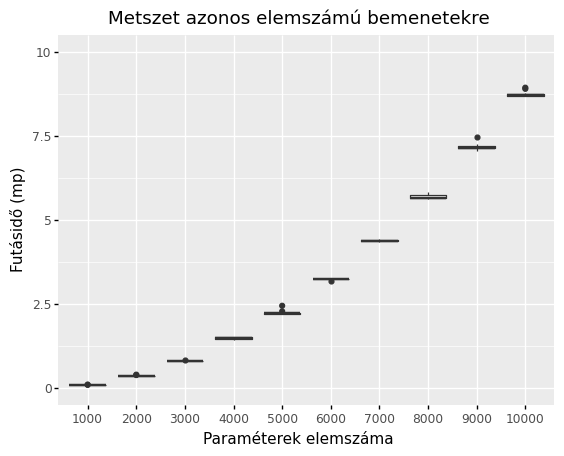

<ggplot: (8728157076902)>

In [28]:
intersection_diagonal = intersection_df.query("param1 == param2").copy()
intersection_diagonal["param_cat"] = pandas.Categorical(intersection_diagonal.param1)
intersection_plot = (
    ggplot(intersection_diagonal, aes(x="param_cat", y="seconds"))
    + geom_boxplot()
    + xlab("Paraméterek elemszáma")
    + ylab("Futásidő (mp)")
    + ggtitle("Metszet azonos elemszámú bemenetekre")
    + ylim(0, 10)
)
intersection_plot

### 2.2. Unió

A következő algoritmus úgy állítja elő a két bemenő sorozat unióját, hogy az első paramétert lemásolja, majd a másodikból kiválogatja azokat az elemeket, amik az első paraméterben nem találhatóak meg. A fent bemutatott metszet algoritmushoz hasonlóan négyzetes futási idejű.

In [ ]:
def union(array1, array2):
    result = array1[:]
    for element in array2:
        if not _does_include(array1, element):
            result.append(element)
    return result

Az alábbi kereszttábla nagyon hasonló értékeket mutat, mint amiket a metszetnél láthattunk, bár a legtöbb érték néhány századmásodperccel magasabb.

In [29]:
union_df = pandas.read_csv("data/union.csv")
pandas.crosstab(union_df.param1, union_df.param2, values=union_df.seconds, aggfunc="mean")

param2,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000
param1,,,,,,,,,,
1000,0.090852,0.180835,0.270509,0.361186,0.459607,0.546264,0.632037,0.723789,0.811616,0.901637
2000,NaN,0.363865,0.540184,0.733855,0.910440,1.091256,1.286803,1.452705,1.621274,1.830257
3000,NaN,NaN,0.813118,1.088361,1.373603,1.651648,1.897947,2.165307,2.499989,2.699601
4000,NaN,NaN,NaN,1.432718,1.820029,2.162033,2.555183,2.905704,3.261712,3.626609
5000,NaN,NaN,NaN,NaN,2.250567,2.708840,3.167764,3.580671,4.016328,4.457057
6000,NaN,NaN,NaN,NaN,NaN,3.189294,3.728648,4.314834,4.795246,5.349383
7000,NaN,NaN,NaN,NaN,NaN,NaN,4.364509,4.938315,5.742100,6.258524
8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.690958,6.481376,7.118930
9000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.172333,7.953645


Az ábráról a metszet algoritmushoz hasonlóan négyzetes futási idő olvasható le, szintén kevés kiugró értékkel. Ismét 10 másodperces skálán mozogtak az értékek.

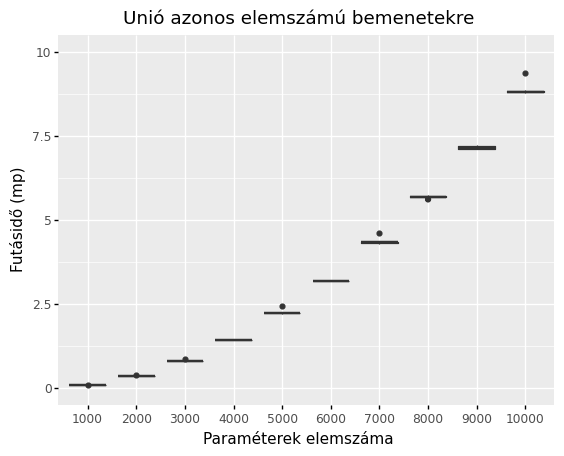

<ggplot: (8728158305440)>

In [30]:
union_diagonal = union_df.query("param1 == param2").copy()
union_diagonal["param_cat"] = pandas.Categorical(union_diagonal.param1)
union_plot = (
    ggplot(union_diagonal, aes(x="param_cat", y="seconds"))
    + geom_boxplot()
    + xlab("Paraméterek elemszáma")
    + ylab("Futásidő (mp)")
    + ggtitle("Unió azonos elemszámú bemenetekre")
    + ylim(0, 10)
)
union_plot

### 2.3. Összefuttatás

Az összefuttatás algoritmus két rendezett sorozatból előállítja azt a rendezett sorozatot, ami tartalmaz minden elemet, amit legalább az egyik bemenő sorozat tartalmaz. Az eredmény tehát a két bemenő sorozat halmazelméleti uniója. Ez az algoritmus azonban nem tartalmaz egymásba ágyazott ciklusokat, a két bemeneten egyszerre iterál. Emiatt a futásideje a bemenő sorozatok hosszával arányosan nő (lineáris idejű).

In [ ]:
def merge_sorted(array1, array2):
    result = []
    n = len(array1)
    m = len(array2)
    i = 0
    j = 0
    while i < n and j < m:
        a_current = array1[i]
        b_current = array2[j]
        if a_current < b_current:
            result.append(a_current)
            i += 1
        elif a_current == b_current:
            result.append(a_current)
            i += 1
            j += 1
        else:
            result.append(b_current)
            j += 1
    if i >= n:
        result += array2[j:]
    else:
        result += array1[i:]
    return result

Az alábbi kereszttáblában látható értékek négy (!) nagyságrenddel kisebbek, mint a rendezetlen unió algoritmus mérési eredményei. Míg ott a legnagyobb bemenetekre a futásidő megközelítette a 10 másodpercet, itt akkor is egy század alatt marad.

In [9]:
merge = pandas.read_csv("data/merge_sorted.csv")
pandas.crosstab(merge.param1, merge.param2, values=merge.seconds, aggfunc="mean")

param2,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000
param1,,,,,,,,,,
1000,0.000363,0.000531,0.000750,0.000918,0.001078,0.001265,0.001437,0.001634,0.001788,0.001969
2000,NaN,0.000713,0.000913,0.001095,0.001267,0.001445,0.001617,0.001816,0.001970,0.002136
3000,NaN,NaN,0.001094,0.001260,0.001438,0.001621,0.001794,0.001963,0.002142,0.002325
4000,NaN,NaN,NaN,0.001437,0.001631,0.001784,0.001963,0.002147,0.002307,0.002504
5000,NaN,NaN,NaN,NaN,0.001784,0.001965,0.002138,0.002319,0.002491,0.002670
6000,NaN,NaN,NaN,NaN,NaN,0.002151,0.002326,0.002500,0.002677,0.002850
7000,NaN,NaN,NaN,NaN,NaN,NaN,0.002529,0.002657,0.002855,0.003008
8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002820,0.003010,0.003204
9000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003214,0.003377


Az ábrán szépen kirajzolódik a lineáris futási idő.

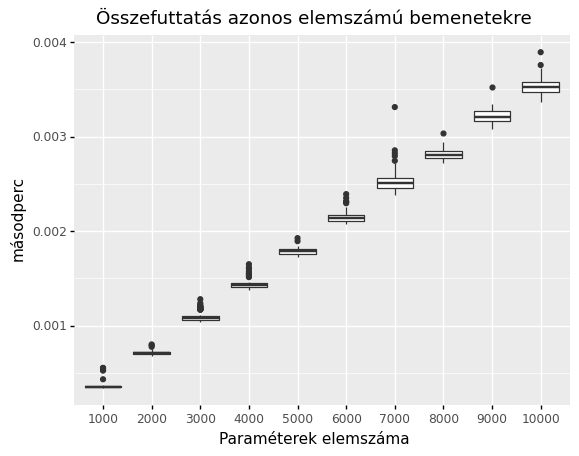

<ggplot: (8728157263246)>

In [22]:
merge_diagonal = merge.query("param1 == param2").copy()
merge_diagonal["param_cat"] = pandas.Categorical(merge_diagonal.param1)
merge_plot = (
    ggplot(merge_diagonal, aes(x="param_cat", y="seconds"))
    + geom_boxplot()
    + xlab("Paraméterek elemszáma")
    + ylab("Futásidő (mp)")
    + ggtitle("Összefuttatás azonos elemszámú bemenetekre")
)
merge_plot